### Classificação
Analisar o dataset 'iris' disponibilizado na pasta data, criar um modelo de classificação para os dados e avaliar as métricas

#### Importando bibliotecas

In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

### Avaliação de métricas
from sklearn.metrics import accuracy_score

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### Leitura de dados

In [3]:
data = pd.read_csv("data/iris.csv")
data.head() # imprimir 5 primeiros registros

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


O conjunto de dados Iris é um conjunto de dados clássico frequentemente usado em aprendizado de máquina e estatística para fins de demonstração e prática. Ele contém informações sobre amostras de três espécies diferentes de íris: Iris setosa, Iris virginica e Iris versicolor. Cada amostra possui quatro características medidas em centímetros Sépala comprimento/tamanho e Comprimento/tamanho de pétala.

![Imagem de iris](imagens/Flores_de_Íris.png)


#### Análise exploratória

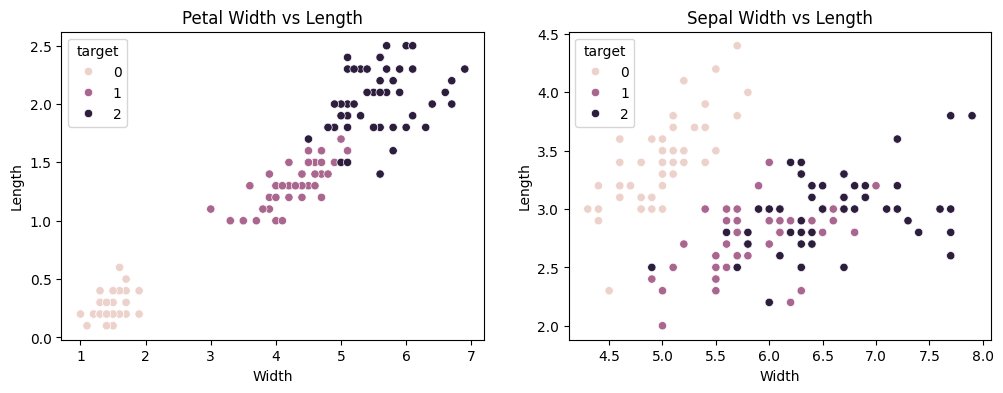

In [4]:
#Configura o Tamanho da Imagem 12 x 4 Polegadas
plt.figure(figsize=(12,4))

#Cria um sub plot (serve para colocar um gráfico do lado do outro, neste exemplo)
plt.subplot(1,2,1)

#Usa a biblioteca Seaborn para ler o Dataset e plotar em um gráfico de dispersão
sns.scatterplot(data=data, x = "petal length (cm)", y = "petal width (cm)", hue = "target")
plt.title("Petal Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")

#O mesmo procedimento para o segundo gráfico
plt.subplot(1,2,2)
sns.scatterplot(data=data, x = "sepal length (cm)", y = "sepal width (cm)", hue = "target")
plt.title("Sepal Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")

plt.show()

#### Definição do modelo e treino

In [5]:
# instanciando modelos
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

In [6]:
# Separando dados
## Variáveis preditoras
X = data.loc[:,["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
X = np.array(X)

## Variável alvo
y = data["target"]
y = np.array(y)

## Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(f"Tamanho X de treino: {X_train.shape}")
print(f"Tamanho X de teste: {X_test.shape}")
print(f"Tamanho y de treino: {y_train.shape}")
print(f"Tamanho y de teste: {y_test.shape}")

Tamanho X de treino: (120, 4)
Tamanho X de teste: (30, 4)
Tamanho y de treino: (120,)
Tamanho y de teste: (30,)


In [7]:
# Treinando modelos
tree.fit(X_train, y_train)

rf.fit(X_train, y_train)

knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Testando e avaliando modelos

In [8]:
# Prevendo valores
tree_predict = tree.predict(X_test)

rf_predict = rf.predict(X_test)

knn_predict = knn.predict(X_test)

In [9]:
# Avaliação
tree_score = accuracy_score(y_test, tree_predict)
rf_score = accuracy_score(y_test, rf_predict)
knn_score = accuracy_score(y_test, knn_predict)

print(f"Pontuação Decision Tree:{tree_score}")
print(f"Pontuação Random Forest:{rf_score}")
print(f"Pontuação KNN:{knn_score}")

Pontuação Decision Tree:1.0
Pontuação Random Forest:0.9666666666666667
Pontuação KNN:0.9666666666666667


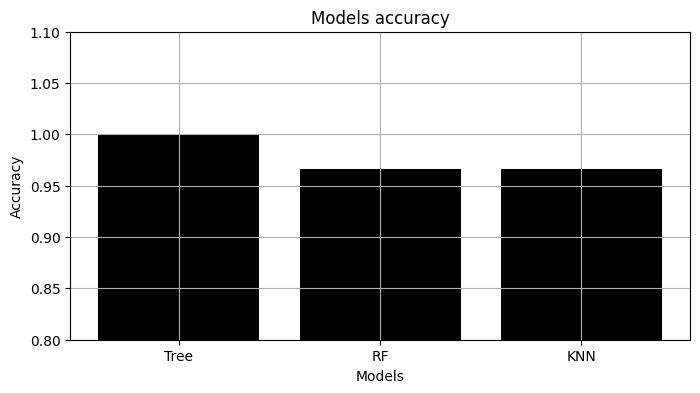

In [10]:
# Plotando resultados
plt.figure(figsize = (8,4))
plt.title("Models accuracy")
plt.bar(x = [0,1,2], height = [tree_score, rf_score, knn_score], color = "black")
plt.xticks([0,1,2], ["Tree","RF", "KNN"])
plt.ylim(0.8,1.1)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.grid()
plt.show()

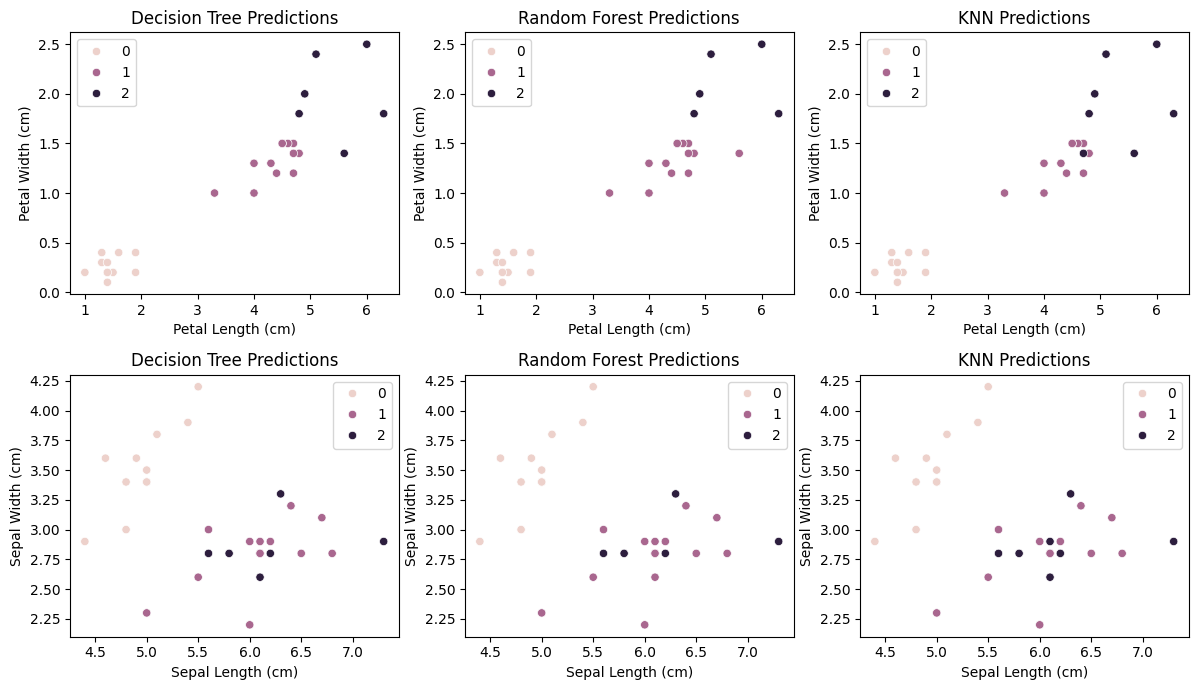

In [16]:

# Plotando os resultados
plt.figure(figsize=(12, 7))

# Plot para Árvore de Decisão
plt.subplot(2, 3, 4)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=tree_predict)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Tree Predictions')

# Plot para Floresta Aleatória
plt.subplot(2, 3, 5)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=rf_predict)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Random Forest Predictions')

# Plot para KNN
plt.subplot(2, 3, 6)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=knn_predict)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KNN Predictions')


# Plot para Árvore de Decisão
plt.subplot(2, 3, 1)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=tree_predict)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Tree Predictions')

# Plot para Floresta Aleatória
plt.subplot(2, 3, 2)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=rf_predict)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Random Forest Predictions')

# Plot para KNN
plt.subplot(2, 3, 3)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=knn_predict)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KNN Predictions')

plt.tight_layout()
plt.show()


#### Exercício

Fazer a Classificação do DataSet "Wine" de vinhos na pasta Data usando qualquer um dos algoritimos de Treino.

![Dataset wine](imagens/vinho.jpg)

Não é necessário usar os três algoritmos. Pode só escolher um e fazer o exercício.

#### Wine Dataset

#### Leitura dos Dados

Leia o wine.csv e use a função head para mostrar os primeiros elementos

#### Análise Exploratória

Como esse Dataset possui muitas variáveis, plote um gráfico de histograma para facilitar. Basta usar a função data.hist(figsize=(15,10))

#### Definição do Modelo e treino

#### Instâncie o seu modelo

#### Separando Variáveis

A coluna alvo é a coluna 'Wine' que tem os tipos 1, 2 e 3 de vinhos. Separe o alvo(y) das features(x).
Dica: Use a função X = data.drop('Wine', axis=1) para remover a coluna de target. É mais fácil so que selecionar todos as colunas que não são alvo

#### Divida os dados x e y em treino e teste da forma que foi mostrada em Irís

#### Treinando os Modelos

#### Testando e valiando os Modelos

Prevendo os valores

Mostre a precisão do Algoritmo que foi escolhido. Não é necessário plotar